In [1]:
import sys,os
sys.path.append('..')
sys.path.append('../..')
from backtester import matlab, backtester
from backtester.analysis import *
from backtester.swarms.manager import SwarmManager
from backtester.exoinfo import EXOInfo

import pandas as pd
import numpy as np
import scipy

In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [3]:
swarms = {}
for file in os.listdir('./temp_swarms/'):
    swarm_name = file.replace('.swm','')
    swarms[swarm_name] = SwarmManager.load(os.path.join('temp_swarms', file))

In [4]:
campaign_dict = {}
for swarm_name, smgr in swarms.items():
        smgr = swarms[swarm_name]
        campaign_dict[swarm_name] = smgr.swarm_picked.sum(axis=1)
   
    
campaign_portfolio = pd.DataFrame(campaign_dict)

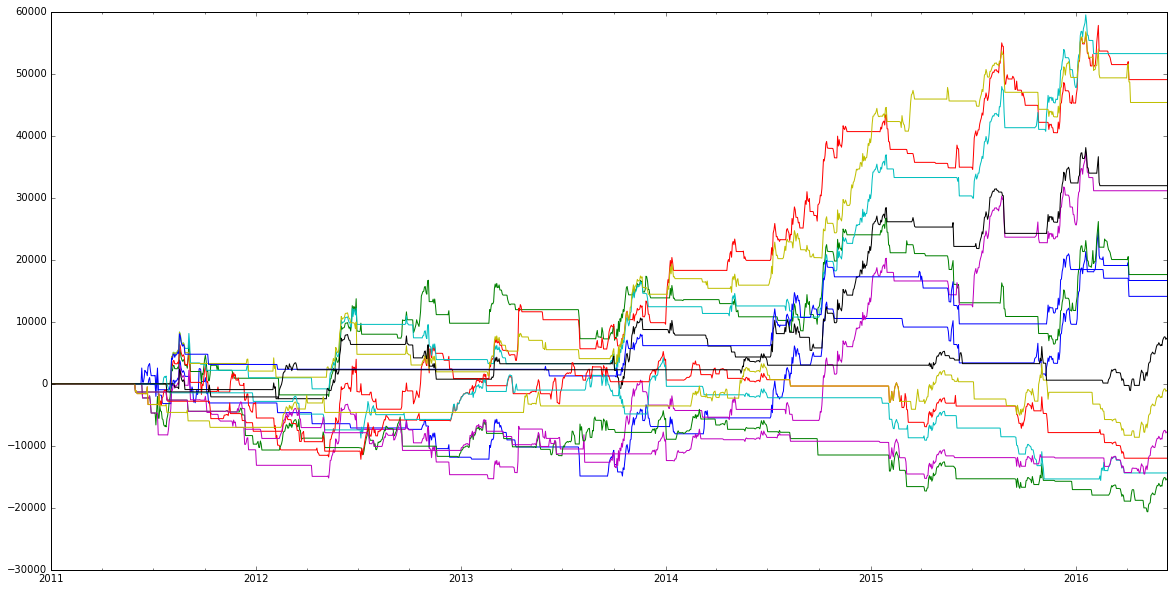

In [5]:
figsize(20,10)
campaign_portfolio.plot(legend=False)

## Rng strategies

In [79]:
#
# random time series
#
df = pd.DataFrame()
for i in range(10):
    
    date = pd.date_range(start='2015-01', end='2016-10', freq='D')
    price = np.random.randint(-100, 101, size=len(date))
    
    ser = pd.Series(price, index=date, name='rng_system'+str(i))
    df['rng_system'+str(i)] = ser.cumsum()

## Select input DF. Real swarms or RNG pseudo strategies

In [88]:
# Real swarms
#df = campaign_portfolio

# Rng strategies
#df = df

# Real swarms from DF
df = pd.read_csv('./swarms_df/ichi_swarm.csv', parse_dates=[0],
                dayfirst=True, index_col=0).asfreq('D')

KeyboardInterrupt: 

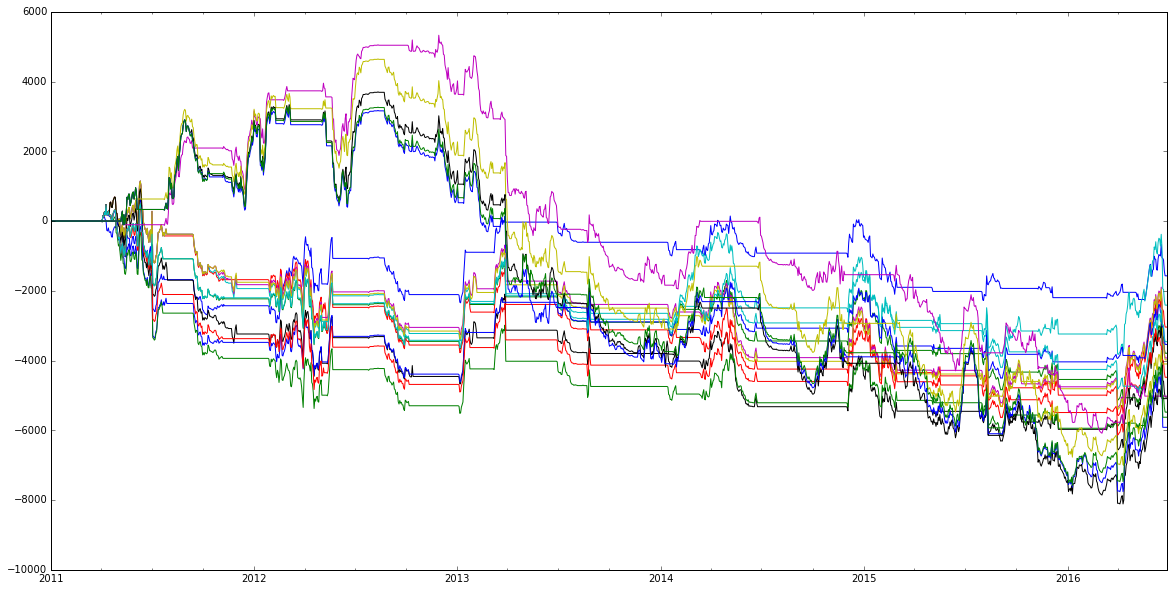

In [81]:
#df.plot()

## Systems overall performance estimation

In [164]:
temp_l = []

for strat in df.columns:

        input_strategy_data = df[strat] # This data is used in metrics calc

        price_change = input_strategy_data.diff()
        max_dd = (input_strategy_data - input_strategy_data.expanding().max()).min()
        netprofit = df[strat].ix[-1] - df[strat].ix[0]

        # Since swarm PnL statistics is not trade-by-trade
        # For PF calc I used cumulative values of positive and negatives price changes
        # Same for winrate
        profit_factor = price_change[price_change > 0].sum() / np.abs(price_change[price_change < 0].sum())

        winrate = (price_change[price_change > 0].count() / price_change.count()) * 100               

        modsharpe = np.mean(price_change) / np.std(price_change)

        d = {'strategy': strat,
            'stats_pricechange_modsharpe': modsharpe, 
            'stats_netprofit': netprofit,
            'stats_max_dd': max_dd, 'stats_recovery_factor': netprofit / np.abs(max_dd),
            'stats_profit_factor': profit_factor, 'stats_winrate': winrate }

        temp_l.append(d)

In [165]:
strategies_performance_df = pd.DataFrame(temp_l).ix[:200]
strategies_performance_df['rank_score'] = np.zeros_like(len(strategies_performance_df))
strategies_performance_df

,stats_max_dd,stats_netprofit,stats_pricechange_modsharpe,stats_profit_factor,stats_recovery_factor,stats_winrate,strategy,rank_score
0,-3547.50,-1582.00,-0.001741,0.991187,-0.445948,13.874346,"(1, 5, 26, 26, 40, 0, 1)",0
1,-5762.25,-3801.50,-0.032109,0.863596,-0.659725,18.150087,"(1, 5, 26, 26, 40, 0, 11)",0
2,-6724.75,-3051.50,-0.031564,0.866574,-0.453772,18.586387,"(1, 5, 26, 26, 40, 0, 13)",0
3,-5024.50,-2423.25,-0.026410,0.890529,-0.482287,20.506108,"(1, 5, 26, 26, 40, 0, 15)",0
4,-6485.50,-3937.25,-0.033485,0.860339,-0.607085,19.546248,"(1, 5, 26, 26, 40, 0, 17)",0
5,-6541.00,-3992.75,-0.035381,0.853369,-0.610419,19.633508,"(1, 5, 26, 26, 40, 0, 19)",0
6,-7480.00,-5056.75,-0.039516,0.837924,-0.676036,19.720768,"(1, 5, 26, 26, 40, 0, 21)",0
7,-5076.25,-3549.50,-0.031057,0.860618,-0.699237,15.270506,"(1, 5, 26, 26, 40, 0, 3)",0
8,-6606.50,-5490.50,-0.046676,0.798735,-0.831075,15.794066,"(1, 5, 26, 26, 40, 0, 5)",0
9,-6608.50,-4491.50,-0.038844,0.834262,-0.679655,17.452007,"(1, 5, 26, 26, 40, 0, 7)",0


## Strategies overall performance ranking

In [166]:
ranks_d = {}

for col in strategies_performance_df.columns:
    
    stats_col_flag = False
    
    if 'stats' in col:

        # Define 0-10-20-30-40-50-60-70-80-90-100 quantiles values of certain strategy statistics
        metric_quantile0 = strategies_performance_df[col].quantile(0.0)
        metric_quantile10 = strategies_performance_df[col].quantile(0.1)
        metric_quantile20 = strategies_performance_df[col].quantile(0.2)
        metric_quantile30 = strategies_performance_df[col].quantile(0.3)
        metric_quantile40 = strategies_performance_df[col].quantile(0.4)
        metric_quantile50 = strategies_performance_df[col].quantile(0.5)
        metric_quantile60 = strategies_performance_df[col].quantile(0.6)
        metric_quantile70 = strategies_performance_df[col].quantile(0.7)
        metric_quantile80 = strategies_performance_df[col].quantile(0.8)
        metric_quantile90 = strategies_performance_df[col].quantile(0.9)
        metric_quantile100 = strategies_performance_df[col].quantile(1)
        
        stats_col_flag = True
    
    if stats_col_flag == True:
        
        for strat in strategies_performance_df.strategy:
        
            # Define strategy statistics rank of certain strategy

            strategy_stats_metric = strategies_performance_df[strategies_performance_df.strategy == strat][col].values[0]

            if strategy_stats_metric >= metric_quantile0 and strategy_stats_metric <= metric_quantile10:
                rank_score = 0

            elif strategy_stats_metric >= metric_quantile10 and strategy_stats_metric <= metric_quantile20:
                rank_score = 1

            elif strategy_stats_metric >= metric_quantile20 and strategy_stats_metric <= metric_quantile30:
                rank_score = 2

            elif strategy_stats_metric >= metric_quantile30 and strategy_stats_metric <= metric_quantile40:
                rank_score = 3

            elif strategy_stats_metric >= metric_quantile40 and strategy_stats_metric <= metric_quantile50:
                rank_score = 4

            elif strategy_stats_metric >= metric_quantile50 and strategy_stats_metric <= metric_quantile60:
                rank_score = 5

            elif strategy_stats_metric >= metric_quantile60 and strategy_stats_metric <= metric_quantile70:
                rank_score = 6

            elif strategy_stats_metric >= metric_quantile70 and strategy_stats_metric <= metric_quantile80:
                rank_score = 7

            elif strategy_stats_metric >= metric_quantile80 and strategy_stats_metric <= metric_quantile90:
                rank_score = 8

            elif strategy_stats_metric >= metric_quantile90 and strategy_stats_metric <= metric_quantile100:
                rank_score = 9

            elif strategy_stats_metric == metric_quantile100:
                rank_score = 10

                
            if strat not in ranks_d.keys():               
                ranks_d[strat] = rank_score
                
            elif strat in ranks_d.keys():                
                ranks_d[strat] = ranks_d[strat] + rank_score
                          
            # For debugging purposes

            #print('strategy---',strat,'\n')
            #print(col)
            #print('10 quantile---',metric_quantile10)
            #print(strategy_stats_metric)
            #print('60 quantile---',metric_quantile60)
            #print(strategy_stats_metric > metric_quantile40 and strategy_stats_metric < metric_quantile50)
            #print('rank_score------', rank_score, '\n')

        #print("NEXT----------------------- \n")

# Set rank scores for strategies from dict

for k in ranks_d:
    
    strat_index = strategies_performance_df[strategies_performance_df.strategy == k].index
    strategies_performance_df = strategies_performance_df.set_value(strat_index, 'rank_score', ranks_d[k])

In [167]:
strategies_performance_df

,stats_max_dd,stats_netprofit,stats_pricechange_modsharpe,stats_profit_factor,stats_recovery_factor,stats_winrate,strategy,rank_score
0,-3547.50,-1582.00,-0.001741,0.991187,-0.445948,13.874346,"(1, 5, 26, 26, 40, 0, 1)",40
1,-5762.25,-3801.50,-0.032109,0.863596,-0.659725,18.150087,"(1, 5, 26, 26, 40, 0, 11)",26
2,-6724.75,-3051.50,-0.031564,0.866574,-0.453772,18.586387,"(1, 5, 26, 26, 40, 0, 13)",28
3,-5024.50,-2423.25,-0.026410,0.890529,-0.482287,20.506108,"(1, 5, 26, 26, 40, 0, 15)",32
4,-6485.50,-3937.25,-0.033485,0.860339,-0.607085,19.546248,"(1, 5, 26, 26, 40, 0, 17)",24
5,-6541.00,-3992.75,-0.035381,0.853369,-0.610419,19.633508,"(1, 5, 26, 26, 40, 0, 19)",24
6,-7480.00,-5056.75,-0.039516,0.837924,-0.676036,19.720768,"(1, 5, 26, 26, 40, 0, 21)",19
7,-5076.25,-3549.50,-0.031057,0.860618,-0.699237,15.270506,"(1, 5, 26, 26, 40, 0, 3)",24
8,-6606.50,-5490.50,-0.046676,0.798735,-0.831075,15.794066,"(1, 5, 26, 26, 40, 0, 5)",13
9,-6608.50,-4491.50,-0.038844,0.834262,-0.679655,17.452007,"(1, 5, 26, 26, 40, 0, 7)",19


## Drop all strategies which have rank score less than n quantile value 

In [175]:
df = df[strategies_performance_df[strategies_performance_df.rank_score >= strategies_performance_df.rank_score.quantile(0.7)].strategy]

In [183]:
df.corr().ix[1]

(1, 5, 26, 26, 40, 0, 1)      0.453597
(1, 5, 26, 26, 40, 10, 1)     1.000000
(1, 5, 26, 26, 40, 10, 11)    0.774309
(1, 5, 26, 26, 40, 10, 13)    0.748786
(1, 5, 26, 26, 40, 10, 17)    0.805943
(1, 5, 26, 26, 40, 10, 19)    0.778115
(1, 5, 26, 26, 40, 10, 21)    0.684599
(1, 5, 26, 26, 40, 10, 5)     0.740531
(1, 5, 26, 26, 40, 10, 9)     0.815038
(1, 5, 26, 26, 40, 11, 19)    0.630610
(1, 5, 26, 26, 40, 11, 21)    0.623278
(1, 5, 26, 26, 40, 11, 5)     0.697711
(1, 5, 26, 26, 40, 13, 1)    -0.348653
(1, 5, 26, 26, 40, 13, 11)   -0.453011
(1, 5, 26, 26, 40, 13, 15)   -0.397627
(1, 5, 26, 26, 40, 13, 17)   -0.027977
(1, 5, 26, 26, 40, 13, 3)    -0.197694
(1, 5, 26, 26, 40, 13, 5)    -0.141027
(1, 5, 26, 26, 40, 13, 7)    -0.215068
(1, 5, 26, 26, 40, 13, 9)    -0.430953
(1, 5, 26, 26, 40, 14, 1)     0.136633
(1, 5, 26, 26, 40, 14, 15)    0.033545
(1, 5, 26, 26, 40, 14, 3)     0.199099
(1, 5, 26, 26, 40, 14, 5)     0.255859
(1, 5, 26, 26, 40, 15, 3)    -0.148332
(1, 5, 26, 26, 40, 16, 1)

# Metrics calculation

In [154]:
#
# Rebalance triggers
#
# Rebalance trigger must be array of Datetime indexes when event occurred, like date of monday or new month
# 
newmonth = df[df.index.month != df.index.shift(1).month].index

monday = df[df.index.weekday == 0].index

norebalance = [df.index[-1]]

newyear = df[df.index.year != df.index.shift(1).year].index
#
#
#

# note: I think more performance metrics for strategies is better
# https://www.amibroker.com/guide/h_report.html for reference

rebalance_index = 1
rebalance_date_start = None

rebalance_trigger = norebalance # set rebalance trigger here

temp_l = []

for reb_idx in rebalance_trigger:
    
    for strat in df.columns:

        if rebalance_index == 1:
            rebalance_date_start = df.index[0]
           
        for i in range(len(df[strat])):

            if df[strat].index[i] == reb_idx:

                input_strategy_data = df[strat].ix[rebalance_date_start:reb_idx] # This data is used in metrics calc
                
                price_change = input_strategy_data.diff()
                max_dd = (input_strategy_data - input_strategy_data.expanding().max()).min()
                netprofit = df[strat].ix[reb_idx] - df[strat].ix[rebalance_date_start]
                
                # Since swarm PnL statistics is not trade-by-trade
                # For PF calc I used cumulative values of positive and negatives price changes
                # Same for winrate
                profit_factor = price_change[price_change > 0].sum() / np.abs(price_change[price_change < 0].sum())
                
                winrate = (price_change[price_change > 0].count() / price_change.count()) * 100               
                # If all trades are negative, PF is 0. But later all 0s is replaced with NaN. 
                # To avoid replacing true 0.0 PF set it to 0.000001
                # This made for handling missing data 
                
                # Also winrate can be 0.0, but if PF is NaN - no trades were made
                # This made for handling missing data 
                
                if winrate == 0.0 and np.isnan(profit_factor) == False:
                    winrate = 0.000001
                
                elif winrate == 0.0 and np.isnan(profit_factor) == True:
                    winrate = np.nan
                                
                if profit_factor == 0.0:
                    profit_factor = 0.000001                
                          
                try:
                    modsharpe = np.mean(price_change) / np.std(price_change)
                    
                except ZeroDivisionError:
                    modsharpe = np.nan
            
                
                d = {'strategy': strat,'rebalance_date_start': rebalance_date_start,
                    'rebalance_date_end': reb_idx, 'rebalance_index': rebalance_index,
                    'stats_pricechange_modsharpe': modsharpe, 
                    'stats_netprofit': netprofit,
                    'stats_max_dd': max_dd, 'stats_recovery_factor': netprofit / np.abs(max_dd),
                    'stats_profit_factor': profit_factor, 'stats_winrate': winrate }
                
                '''
                d = {'strategy': strat,'rebalance_date_start': rebalance_date_start,
                    'rebalance_date_end': reb_idx, 'rebalance_index': rebalance_index,
                    'stats_pricechange_modsharpe': modsharpe, 
                    'stats_recovery_factor': netprofit / np.abs(max_dd)}
                '''
                
                temp_l.append(d)
    
    rebalance_index += 1
    rebalance_date_start = reb_idx # set new start rebalance date to current rebalance trigger date

### Data cleaning

In [155]:
# Replacing 0 values with NaNs
# If strategy stats is 0 means that no trades were made
stats_df = pd.DataFrame(temp_l).replace(0, np.nan)

# Filling NaNs with last avaible values
for s in stats_df.strategy.unique():
    stats_df[stats_df.strategy == s] = stats_df[stats_df.strategy == s].fillna(method='pad')

stats_df = stats_df.dropna(how='any')

In [156]:
stats_df

,rebalance_date_end,rebalance_date_start,rebalance_index,stats_max_dd,stats_netprofit,stats_pricechange_modsharpe,stats_profit_factor,stats_recovery_factor,stats_winrate,strategy
0,2016-06-29,2011-01-03,1,-3547.50,-1582.00,-0.001741,0.991187,-0.445948,13.874346,"(1, 5, 26, 26, 40, 0, 1)"
1,2016-06-29,2011-01-03,1,-5762.25,-3801.50,-0.032109,0.863596,-0.659725,18.150087,"(1, 5, 26, 26, 40, 0, 11)"
2,2016-06-29,2011-01-03,1,-6724.75,-3051.50,-0.031564,0.866574,-0.453772,18.586387,"(1, 5, 26, 26, 40, 0, 13)"
3,2016-06-29,2011-01-03,1,-5024.50,-2423.25,-0.026410,0.890529,-0.482287,20.506108,"(1, 5, 26, 26, 40, 0, 15)"
4,2016-06-29,2011-01-03,1,-6485.50,-3937.25,-0.033485,0.860339,-0.607085,19.546248,"(1, 5, 26, 26, 40, 0, 17)"
5,2016-06-29,2011-01-03,1,-6541.00,-3992.75,-0.035381,0.853369,-0.610419,19.633508,"(1, 5, 26, 26, 40, 0, 19)"
6,2016-06-29,2011-01-03,1,-7480.00,-5056.75,-0.039516,0.837924,-0.676036,19.720768,"(1, 5, 26, 26, 40, 0, 21)"
7,2016-06-29,2011-01-03,1,-5076.25,-3549.50,-0.031057,0.860618,-0.699237,15.270506,"(1, 5, 26, 26, 40, 0, 3)"
8,2016-06-29,2011-01-03,1,-6606.50,-5490.50,-0.046676,0.798735,-0.831075,15.794066,"(1, 5, 26, 26, 40, 0, 5)"
9,2016-06-29,2011-01-03,1,-6608.50,-4491.50,-0.038844,0.834262,-0.679655,17.452007,"(1, 5, 26, 26, 40, 0, 7)"


## Statistics rank calculation

In [157]:
rank_scores_l = []
rank_summary_l = []

for i in stats_df.rebalance_index.unique():

    for strat in stats_df[stats_df.rebalance_index == i].strategy:

        for col in stats_df[stats_df.rebalance_index == i].columns:
            if 'stats' in col:

                # Define 0-10-20-30-40-50-60-70-80-90-100 quantiles values of certain strategy statistics
                metric_quantile0 = stats_df[col].quantile(0.0)
                metric_quantile10 = stats_df[col].quantile(0.1)
                metric_quantile20 = stats_df[col].quantile(0.2)
                metric_quantile30 = stats_df[col].quantile(0.3)
                metric_quantile40 = stats_df[col].quantile(0.4)
                metric_quantile50 = stats_df[col].quantile(0.5)
                metric_quantile60 = stats_df[col].quantile(0.6)
                metric_quantile70 = stats_df[col].quantile(0.7)
                metric_quantile80 = stats_df[col].quantile(0.8)
                metric_quantile90 = stats_df[col].quantile(0.9)
                metric_quantile100 = stats_df[col].quantile(1)

                # Define strategy statistics rank of certain strategy

                strategy_stats_metric = stats_df[(stats_df.rebalance_index == i) 
                                                 & (stats_df.strategy == strat)][col].values[0]

                if strategy_stats_metric >= metric_quantile0 and strategy_stats_metric < metric_quantile10:
                    rank_scores_l.append(0)

                elif strategy_stats_metric > metric_quantile10 and strategy_stats_metric < metric_quantile20:
                    rank_scores_l.append(1)

                elif strategy_stats_metric > metric_quantile20 and strategy_stats_metric < metric_quantile30:
                    rank_scores_l.append(2)

                elif strategy_stats_metric > metric_quantile30 and strategy_stats_metric < metric_quantile40:
                    rank_scores_l.append(3)

                elif strategy_stats_metric > metric_quantile40 and strategy_stats_metric < metric_quantile50:
                    rank_scores_l.append(4)

                elif strategy_stats_metric > metric_quantile50 and strategy_stats_metric < metric_quantile60:
                    rank_scores_l.append(5)

                elif strategy_stats_metric > metric_quantile60 and strategy_stats_metric < metric_quantile70:
                    rank_scores_l.append(6)

                elif strategy_stats_metric > metric_quantile70 and strategy_stats_metric < metric_quantile80:
                    rank_scores_l.append(7)

                elif strategy_stats_metric > metric_quantile80 and strategy_stats_metric < metric_quantile90:
                    rank_scores_l.append(8)

                elif strategy_stats_metric > metric_quantile90 and strategy_stats_metric < metric_quantile100:
                    rank_scores_l.append(9)

                elif strategy_stats_metric == metric_quantile100:
                    rank_scores_l.append(10)

                # For debugging purposes

                #print(i)
                #print(col)
                #print('50 quantile---',metric_quantile50)
                #print(strat)
                #print(strategy_stats_metric)
        #print('rank_score------', np.sum(rank_scores_l))

    
        rank_summary_l.append(np.sum(rank_scores_l))        
        rank_scores_l = []
    print('rebalance index ---', i)performance

KeyboardInterrupt: 

In [13]:
stats_df['rank_score'] = rank_summary_l

In [14]:
stats_df

,rebalance_date_end,rebalance_date_start,rebalance_index,stats_max_dd,stats_netprofit,stats_pricechange_modsharpe,stats_profit_factor,stats_recovery_factor,stats_winrate,strategy,rank_score
0,2015-01-05,2015-01-01,1,-120.0,-15.0,-0.059993,0.875000,-0.125000,50.000000,rng_system0,26
1,2015-01-05,2015-01-01,1,-48.0,100.0,0.527457,3.083333,2.083333,75.000000,rng_system1,49
2,2015-01-05,2015-01-01,1,-74.0,103.0,0.404813,2.391892,1.391892,75.000000,rng_system2,47
3,2015-01-05,2015-01-01,1,-85.0,50.0,0.195450,1.581395,0.588235,50.000000,rng_system3,36
4,2015-01-05,2015-01-01,1,-153.0,-153.0,-2.054293,0.000001,-1.000000,0.000001,rng_system4,4
6,2015-01-05,2015-01-01,1,-56.0,-36.0,-0.197862,0.647059,-0.642857,25.000000,rng_system6,20
7,2015-01-05,2015-01-01,1,-80.0,-42.0,-0.185290,0.655738,-0.525000,50.000000,rng_system7,21
8,2015-01-05,2015-01-01,1,-114.0,-96.0,-0.314878,0.505155,-0.842105,50.000000,rng_system8,17
9,2015-01-05,2015-01-01,1,-31.0,69.0,0.374541,3.156250,2.225806,50.000000,rng_system9,44
10,2015-01-12,2015-01-05,2,-79.0,27.0,0.072825,1.168750,0.341772,42.857143,rng_system0,27


### Strategies picker

In [108]:
# Trade-by-trade pnl
pnl_df = df.diff()

summary_best_eqty = pd.Series()
summary_worst_eqty = pd.Series()
benchmark_eqty = pd.Series()
# We can set start rebalance index value to 
for i in range(stats_df.rebalance_index.unique().min(),stats_df.rebalance_index.unique().max()):
    
    if i < 2:
        # We must estimate strategies preformance at least on one rebalance window
        continue
        
    else:

        # Pick strats from previous rebalance, but trade them until next rebalance
                        
        start_date = stats_df[stats_df.rebalance_index == i].rebalance_date_start.values[0]  
        end_date = stats_df[stats_df.rebalance_index == i].rebalance_date_end.values[0]
        
        # Number of picked strats defined by .strategy.values[:number]
        # Remove -1 from 'i - 1' to get holy grail :D (future reference)
        
        picked_best_strats = stats_df[stats_df.rebalance_index == i - 1].sort_values('rank_score', 
                                                                                ascending=False).strategy.values[:3]
        
        picked_worst_strats = stats_df[stats_df.rebalance_index == i - 1].sort_values('rank_score', 
                                                                                ascending=False).strategy.values[-5:]
        
        all_strats = stats_df[stats_df.rebalance_index == i - 1].sort_values('rank_score', 
                                                                                ascending=False).strategy.values[:]
        
        if len(summary_best_eqty) == 0 and len(summary_worst_eqty) == 0 and len(benchmark_eqty) == 0:
            summary_best_eqty = df[picked_best_strats].ix[start_date : end_date].sum(axis=1)           
            summary_worst_eqty = pnl_df[picked_worst_strats].ix[start_date : end_date].sum(axis=1)
            
            benchmark_eqty = pnl_df[all_strats].ix[start_date : end_date].sum(axis=1)      
            
        else:
            summary_best_eqty = summary_best_eqty.append(pnl_df[picked_best_strats].ix[start_date : end_date].sum(axis=1))
            summary_worst_eqty = summary_worst_eqty.append(pnl_df[picked_worst_strats].ix[start_date : end_date].sum(axis=1))
            
            benchmark_eqty = benchmark_eqty.append(pnl_df[all_strats].ix[start_date : end_date].sum(axis=1))
            
        
best_portfolio = summary_best_eqty.cumsum()
worst_portfolio = summary_worst_eqty.cumsum() * -1 # Reversed

summary_portfolio = best_portfolio + worst_portfolio

benchmark_portfolio = benchmark_eqty.cumsum()

## Comparing portfolios stats with benchmark(all strategies equity)

In [109]:
def portfolio_stats(portfolio_ser,label):
    input_data = portfolio_ser # This data is used in metrics calc
                
    price_change = input_data.diff()
    max_dd = (input_data - input_data.expanding().max()).min()
    netprofit = input_data.ix[input_data.index[-1]] - input_data.ix[input_data.index[0]]

    # Since swarm PnL statistics is not trade-by-trade
    # For PF calc I used cumulative values of positive and negatives price changes
    # Same for winrate
    profit_factor = price_change[price_change > 0].sum() / np.abs(price_change[price_change < 0].sum())

    winrate = (price_change[price_change > 0].count() / price_change.count()) * 100               

    modsharpe = np.mean(price_change) / np.std(price_change)

    recovery_factor = netprofit / np.abs(max_dd)

    print('Portfolio name ---', str(label))
    print('\n')
    print('PriceChange Mod. Sharpe', modsharpe)
    print('Netprofit',netprofit)
    print('Max DD', max_dd)
    print('Recovery Factor', recovery_factor)
    print('Profit factor', profit_factor)
    print('Winrate', winrate)

    input_data.plot(kind='area', stacked=False)

Portfolio name --- Best


PriceChange Mod. Sharpe 0.13290798254660485
Netprofit 10205.0
Max DD -1169.0
Recovery Factor 8.72968349016
Profit factor 1.40592680986
Winrate 53.7271448664


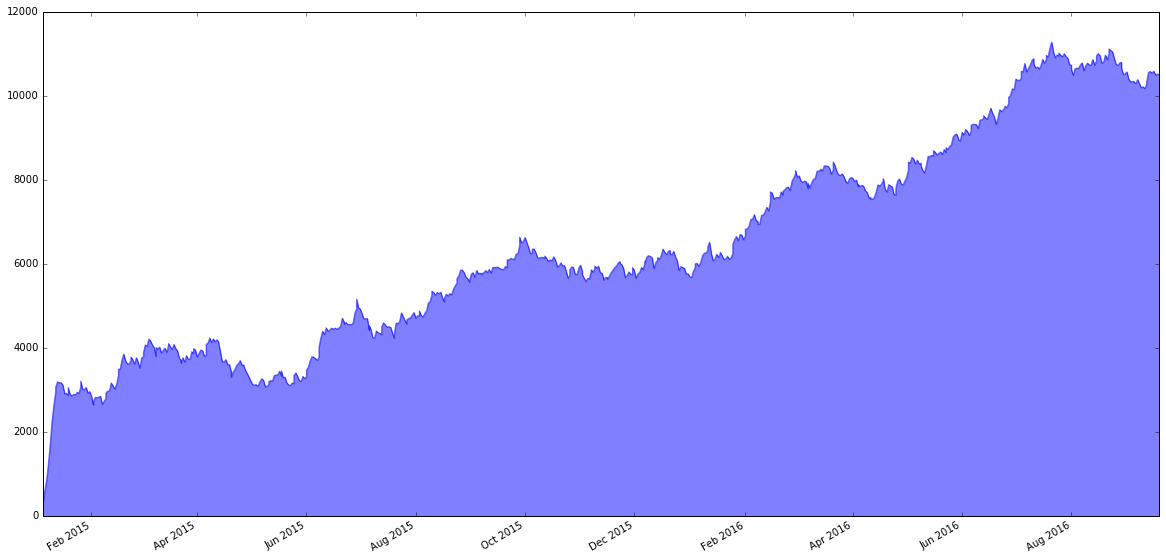

In [110]:
portfolio_stats(best_portfolio, 'Best')

Portfolio name --- Worst(reversed)


PriceChange Mod. Sharpe 0.08668054807825021
Netprofit 8452.0
Max DD -2726.0
Recovery Factor 3.100513573
Profit factor 1.23972544459
Winrate 52.4613220816


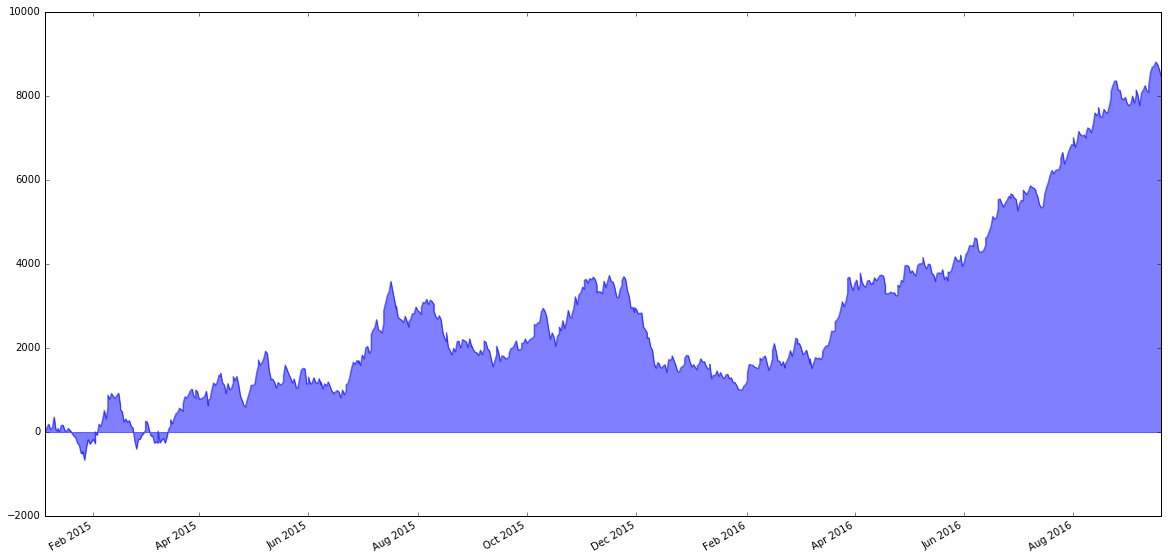

In [111]:
portfolio_stats(worst_portfolio, 'Worst(reversed)')

Portfolio name --- Summary(Best + Worst)


PriceChange Mod. Sharpe 0.14606346974242224
Netprofit 18657.0
Max DD -2449.0
Recovery Factor 7.6182115149
Profit factor 1.43971246759
Winrate 56.1181434599


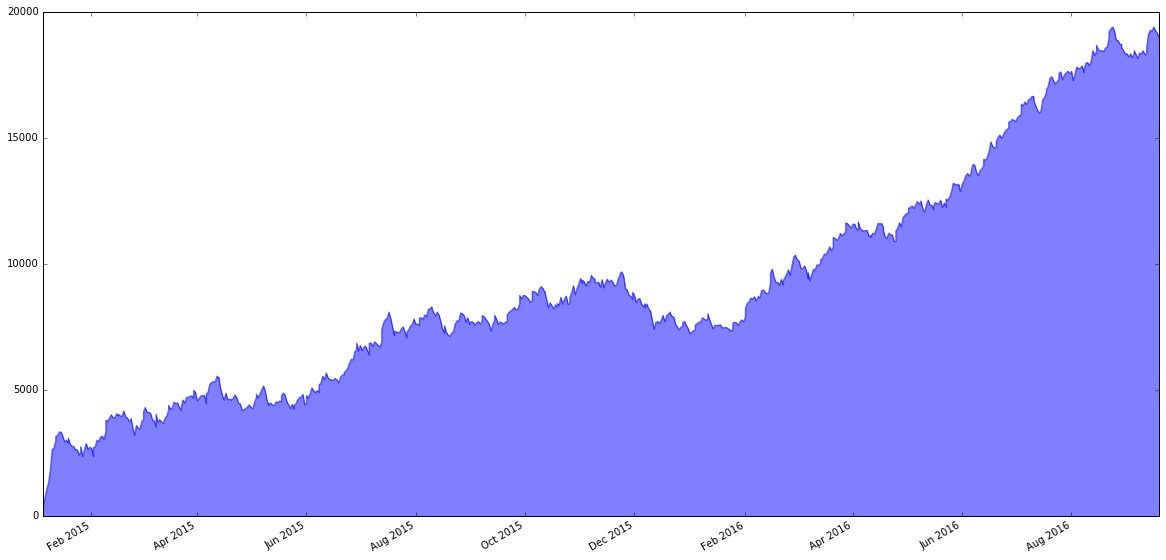

In [113]:
portfolio_stats(summary_portfolio, 'Summary(Best + Worst)')

Portfolio name --- Benchmark


PriceChange Mod. Sharpe -0.004794564155193463
Netprofit -641.0
Max DD -4671.0
Recovery Factor -0.137229715264
Profit factor 0.988240258311
Winrate 49.2264416315


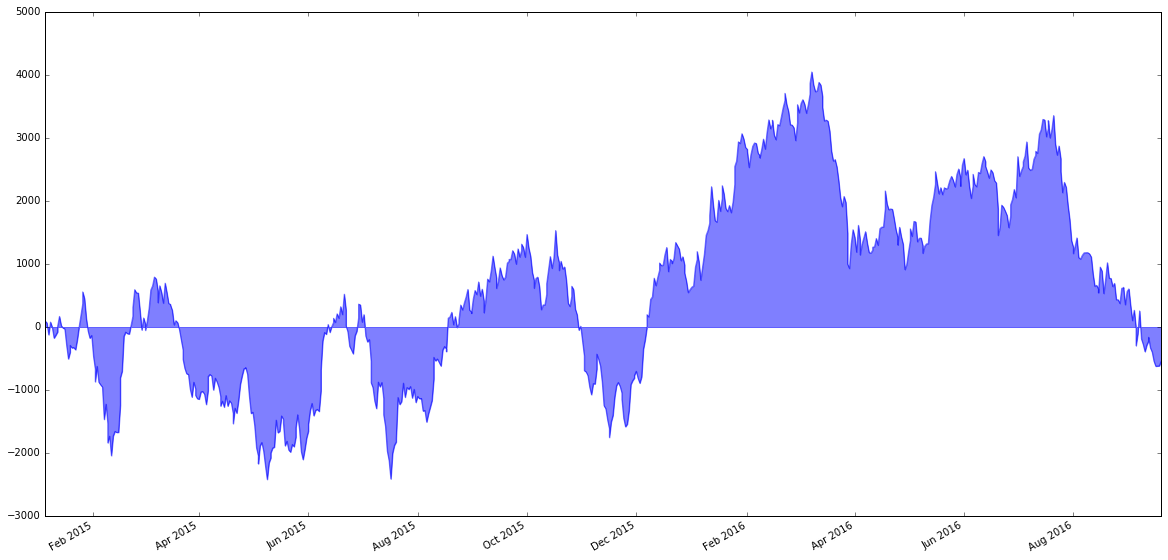

In [114]:
portfolio_stats(benchmark_portfolio, 'Benchmark')